## Exploring The Yield Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import random as random
import numpy as np


sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

In [2]:
dtype_dict = {
    'FarmName_Pseudo': 'str',
    'SE_Number': 'str',
    'AnimalNumber': 'Int64',          
    'StartDate': 'str',
    'StartTime': 'str',
    'LactationNumber': 'float',       
    'DaysInMilk': 'float',
    'YearSeason': 'str',           
    'TotalYield': 'float',
    'DateTime': 'str',
    'BreedName': 'str',
    'BirthDate': 'str',
    'Mother': 'str',
    'Father': 'str',
    'CullDecisionDate': 'str',
    'Temperature': 'float',
    'RelativeHumidity': 'float',      
    'THI_adj': 'float',
    'HW': 'Int64',                    
    'cum_HW': 'Int64',                
    'Temp15Threshold': 'Int64'        
}


# Load the CSV with specified dtypes
data = pd.read_csv('../Data/MergedData/TheYieldData.csv', dtype=dtype_dict)

# Convert date and time columns back to datetime and time objects
data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce')
data['StartTime'] = pd.to_datetime(data['StartTime'], format='%H:%M:%S', errors='coerce').dt.time
data['StartDate'] = pd.to_datetime(data['StartDate'], errors='coerce')
data['BirthDate'] = pd.to_datetime(data['BirthDate'], errors='coerce')
data.head(-5)

FarmName_Pseudo         SE_Number  AnimalNumber  StartDate StartTime  \
0              f454e660   SE-f454e660-323           323 2023-05-26  19:38:00   
1              f454e660  SE-f454e660-0700           700 2022-11-06  16:46:00   
2              f454e660  SE-f454e660-0235           235 2022-12-20  15:42:00   
3              f454e660  SE-f454e660-0504           504 2022-08-06  21:02:00   
4              f454e660  SE-f454e660-0451           451 2022-01-26  06:10:00   
...                 ...               ...           ...        ...       ...   
6582895        6d38bc90  SE-6d38bc90-3146          3146 2024-04-22       NaT   
6582896        6d38bc90  SE-6d38bc90-2774          2774 2024-03-08       NaT   
6582897        6d38bc90  SE-6d38bc90-2774          2774 2024-04-01       NaT   
6582898        6d38bc90  SE-6d38bc90-2748          2748 2024-03-28       NaT   
6582899        6d38bc90  SE-6d38bc90-2748          2748 2024-04-01       NaT   

         LactationNumber  DaysInMilk  TotalYield            DateTime  \
0                    NaN         NaN      15.730 2023-05-26 19:38:00   
1                    NaN         NaN      11.740 2022-11-06 16:46:00   
2                    NaN         NaN      13.490 2022-12-20 15:42:00   
3                    NaN         NaN      18.810 2022-08-06 21:02:00   
4                    NaN         NaN      15.470 2022-01-26 06:10:00   
...                  ...         ...         ...                 ...   
6582895              1.0        56.0       9.695                 NaT   
6582896              3.0        20.0      20.025                 NaT   
6582897              3.0        44.0      24.800                 NaT   
6582898              3.0       117.0      20.000                 NaT   
6582899              3.0       121.0      15.500                 NaT   

        YearSeason  ...  BirthDate            Mother             Father  \
0           2023-2  ... 2016-06-04   SE-f454e660-109       bizon 3-5073   
1           2022-4  ... 2020-06-08   SE-f454e660-464     Spectre 9-3897   
2           2022-1  ... 2015-06-09    SE-f454e660-57   Earnhatdt 9-3335   
3           2022-3  ... 2018-02-28    SE-f454e660-84      Smiley 9-6168   
4           2022-1  ... 2017-08-28   SE-f454e660-958        Bihl 9-4324   
...            ...  ...        ...               ...                ...   
6582895     2024-2  ... 2022-02-18  SE-6d38bc90-2809  22-8376 VR Taison   
6582896     2024-2  ... 2020-03-20  SE-6d38bc90-2401    22-8093 VR Loke   
6582897     2024-2  ... 2020-03-20  SE-6d38bc90-2401    22-8093 VR Loke   
6582898     2024-2  ... 2020-01-08  SE-6d38bc90-1994    3-5129 VH Ossie   
6582899     2024-2  ... 2020-01-08  SE-6d38bc90-1994    3-5129 VH Ossie   

        CullDecisionDate Temperature  RelativeHumidity    THI_adj    HW  \
0                    NaN   11.600000          0.642917  53.193692     0   
1                    NaN    9.695833          0.910542  43.946681     0   
2             2023-11-21    4.541667          0.983750  35.967512     0   
3                    NaN   17.179167          0.653667  56.838291     0   
4                    NaN    1.737500          0.946250  32.113924     0   
...                  ...         ...               ...        ...   ...   
6582895              NaN         NaN               NaN        NaN  <NA>   
6582896              NaN         NaN               NaN        NaN  <NA>   
6582897              NaN         NaN               NaN        NaN  <NA>   
6582898              NaN         NaN               NaN        NaN  <NA>   
6582899              NaN         NaN               NaN        NaN  <NA>   

         cum_HW  Temp15Threshold  
0             0                1  
1             0                0  
2             0                0  
3             0                1  
4             0                0  
...         ...              ...  
6582895    <NA>             <NA>  
6582896    <NA>             <NA>  
6582897    <NA>             <NA>  
6582898    <NA>             <N

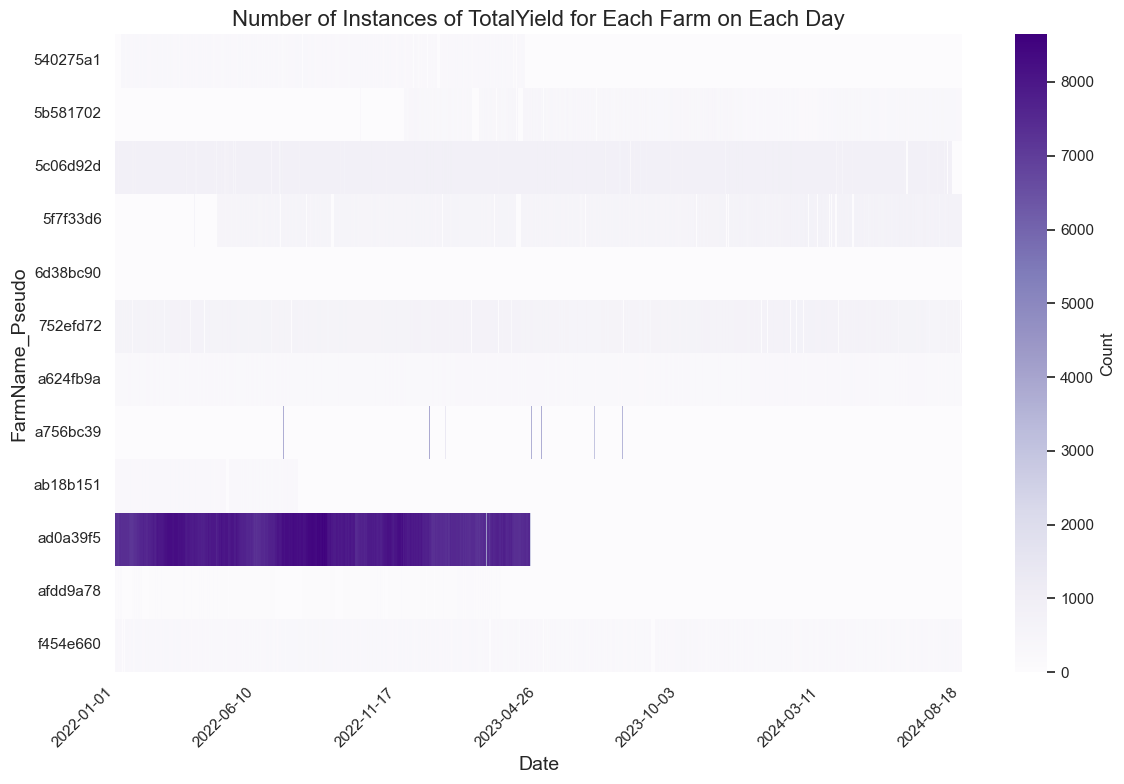

In [3]:
# Group the data by 'FarmName_Pseudo' and 'StartDate', and get the count of 'TotalYield'
count_data = data.groupby(['FarmName_Pseudo', 'StartDate'])['TotalYield'].count().reset_index(name='Count')

# Convert 'StartDate' to datetime
count_data['StartDate'] = pd.to_datetime(count_data['StartDate'])

# Sort the data by date to ensure the labels match the ticks
count_data.sort_values('StartDate', inplace=True)

# Pivot to have 'StartDate' as columns and 'FarmName_Pseudo' as index
pivot_data = count_data.pivot(index='FarmName_Pseudo', columns='StartDate', values='Count').fillna(0)

# Plot data
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data, cmap='Purples', cbar_kws={'label': 'Count'})

num_days = len(pivot_data.columns)
days_between_ticks = num_days // 6  # Adjust this as needed 

ax.set_xticks(range(0, num_days, days_between_ticks))
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in pivot_data.columns[::days_between_ticks]], rotation=45, ha='right')
plt.xlabel('Date', fontsize=14)
plt.ylabel('FarmName_Pseudo', fontsize=14)
plt.title('Number of Instances of TotalYield for Each Farm on Each Day', fontsize=16)

plt.tight_layout()
plt.show()

## Check how much milk each farm yields each day over time

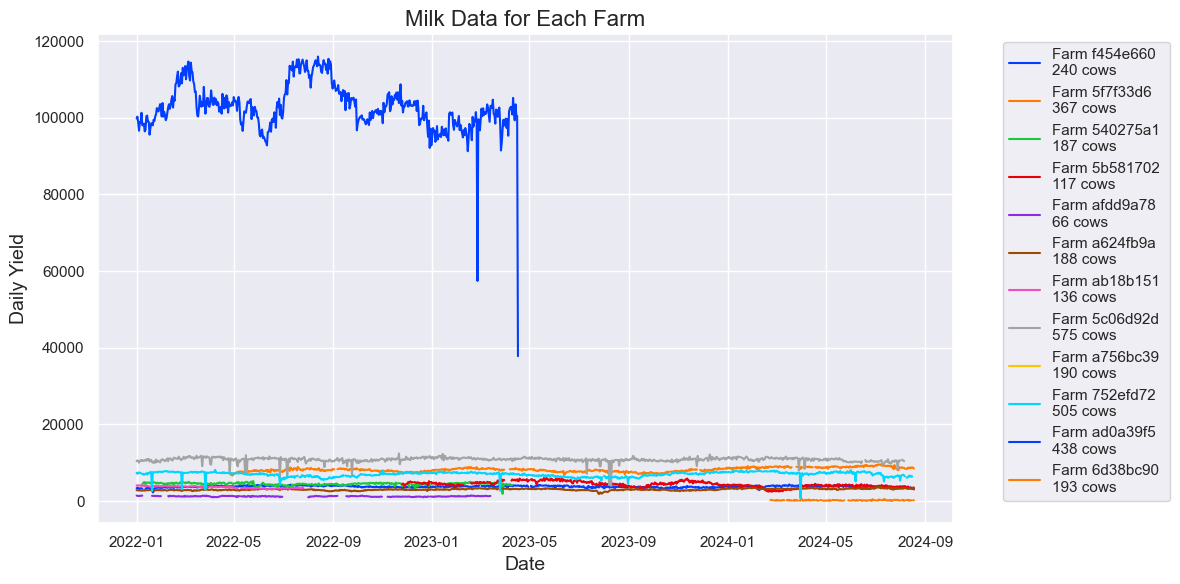

In [4]:
# list of farms
list_of_farms = list(data["FarmName_Pseudo"].unique())
fig, ax = plt.subplots(figsize=(12, 6))

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot
for i, farm in enumerate(list_of_farms):
    
    selected_farm = data[data['FarmName_Pseudo']== farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
    missing_dates = all_dates.difference(daily_yield.index)
    daily_yield = daily_yield.reindex(all_dates)
    
    ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)


ax.set_title('Milk Data for Each Farm', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Daily Yield', fontsize=14)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

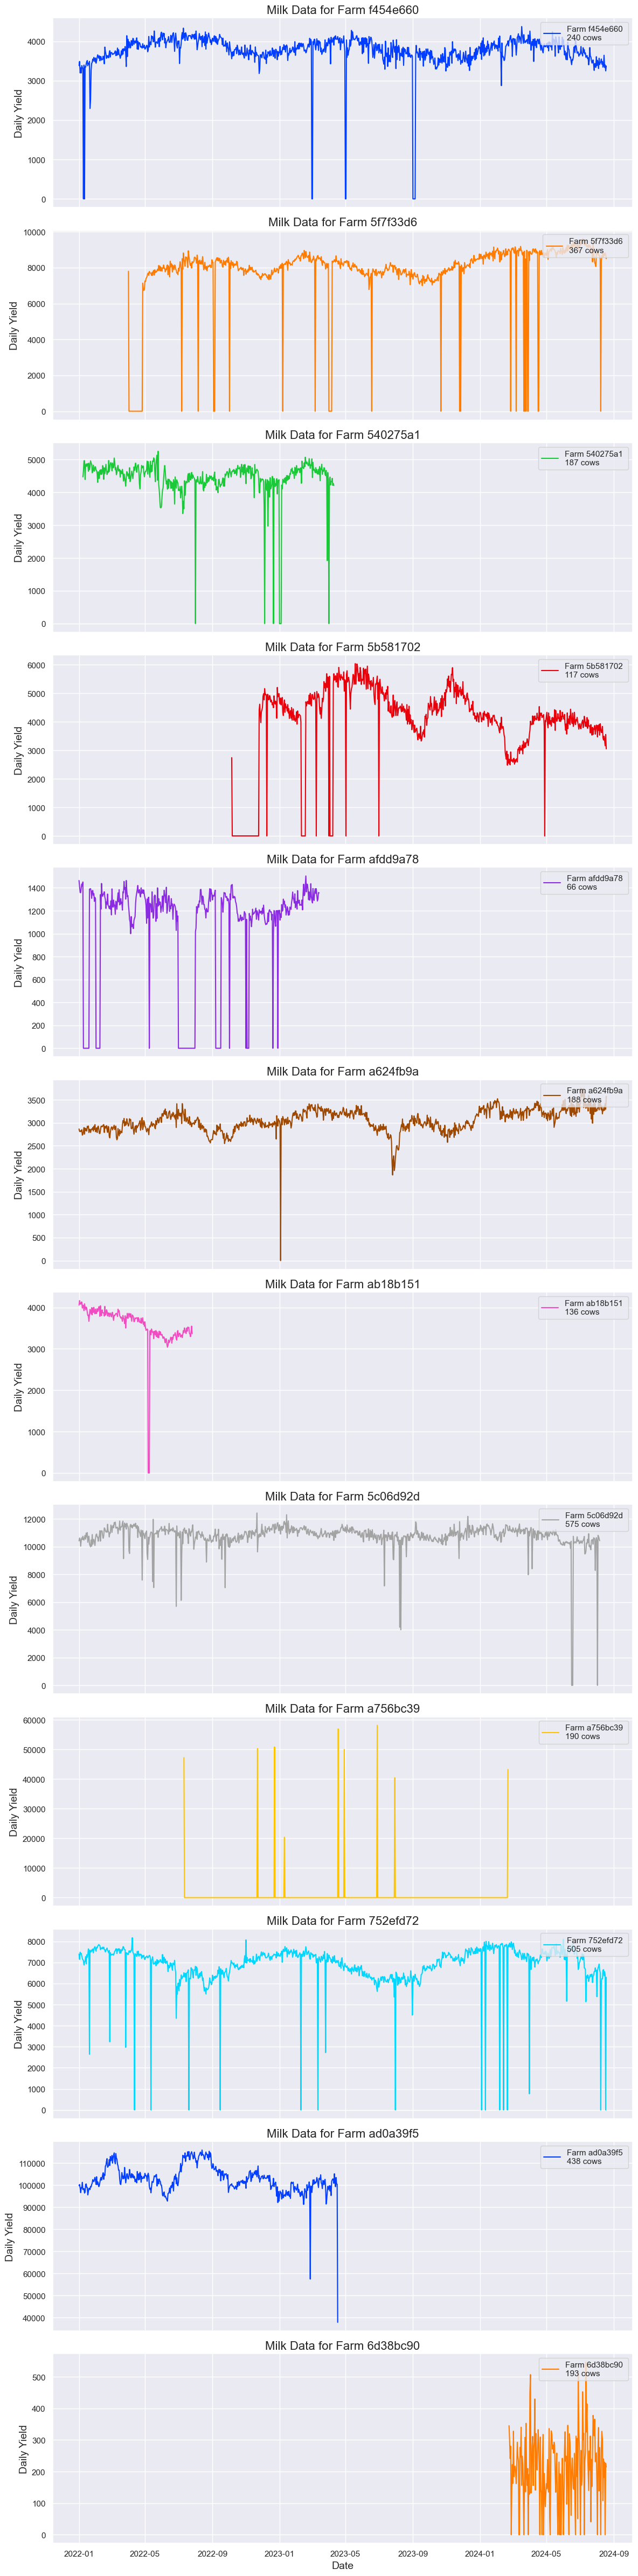

In [5]:
# Create a subplot for each farm
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
    daily_yield = daily_yield.reindex(all_dates, fill_value=0)
    
    ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
    ax.set_title(f'Milk Data for Farm {farm}', fontsize=16)
    ax.set_ylabel('Daily Yield', fontsize=14)
    ax.legend(loc='upper right')
    ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

# Imputation of LactationNumber

In [6]:
# Display the number of rows before filtering
print(f"Original number of rows: {data.shape[0]}")

# Check for missing LactationNumber per farm
missing_lactation_per_farm = data[data['LactationNumber'].isna()].groupby('FarmName_Pseudo').size()

# Display the number of missing LactationNumber entries for each farm
print("\nNumber of missing LactationNumber entries for each farm:")
print(missing_lactation_per_farm)

# Get the total number of rows for each farm
total_rows_per_farm = data.groupby('FarmName_Pseudo').size()

# Calculate the percentage of missing LactationNumber entries
percentage_missing_lactation = (missing_lactation_per_farm / total_rows_per_farm) * 100

# Display the percentage of missing LactationNumber entries for each farm
print("\nPercentage of missing LactationNumber entries for each farm:")
print(percentage_missing_lactation)

Original number of rows: 6582905

Number of missing LactationNumber entries for each farm:
FarmName_Pseudo
540275a1      84096
5b581702         74
5c06d92d          1
5f7f33d6     171820
752efd72         92
a624fb9a      15702
ab18b151         71
ad0a39f5    1857905
afdd9a78      17844
f454e660      44989
dtype: int64

Percentage of missing LactationNumber entries for each farm:
FarmName_Pseudo
540275a1    63.999513
5b581702     0.034780
5c06d92d     0.000126
5f7f33d6    35.380773
6d38bc90          NaN
752efd72     0.014855
a624fb9a     6.080649
a756bc39          NaN
ab18b151     0.120977
ad0a39f5    50.591444
afdd9a78    39.093000
f454e660    16.615515
dtype: float64


In [7]:
del_lactation = pd.read_csv('../Data/CowData/RawGIGACOW/Del_Lactation240823.csv', delimiter=';')
del_lactation['LactationInfoDate'] = pd.to_datetime(del_lactation['LactationInfoDate'], format='%Y-%m-%d', errors='coerce')

# Check for any NaT values in LactationInfoDate
nat_values = del_lactation[del_lactation['LactationInfoDate'].isnull()]
if not nat_values.empty:
    print("Some dates in 'LactationInfoDate' could not be converted, resulting in NaT values.")
    # Optionally, handle NaT rows (e.g., log, fill with defaults, or drop)
    print(nat_values)

# Rename columns for clarity (if needed)
del_lactation.rename(columns={'LactationInfoDate': 'StartDate'}, inplace=True)

# Merge dataframes on 'SE_Number' and 'StartDate'
data = pd.merge(data, del_lactation[['SE_Number', 'StartDate', 'LactationNumber']], 
                on=['SE_Number', 'StartDate'], 
                how='left', 
                suffixes=('', '_Del_Lactation'))

# If LactationNumber in original data is NaN, replace it with the value from Del_Lactation
data['LactationNumber'] = data['LactationNumber'].fillna(data['LactationNumber_Del_Lactation'])

# Drop the additional LactationNumber column from Del_Lactation
data.drop(columns=['LactationNumber_Del_Lactation'], inplace=True)

data.head(-5)

FarmName_Pseudo         SE_Number  AnimalNumber  StartDate StartTime  \
0              f454e660   SE-f454e660-323           323 2023-05-26  19:38:00   
1              f454e660  SE-f454e660-0700           700 2022-11-06  16:46:00   
2              f454e660  SE-f454e660-0235           235 2022-12-20  15:42:00   
3              f454e660  SE-f454e660-0504           504 2022-08-06  21:02:00   
4              f454e660  SE-f454e660-0451           451 2022-01-26  06:10:00   
...                 ...               ...           ...        ...       ...   
6582895        6d38bc90  SE-6d38bc90-3146          3146 2024-04-22       NaT   
6582896        6d38bc90  SE-6d38bc90-2774          2774 2024-03-08       NaT   
6582897        6d38bc90  SE-6d38bc90-2774          2774 2024-04-01       NaT   
6582898        6d38bc90  SE-6d38bc90-2748          2748 2024-03-28       NaT   
6582899        6d38bc90  SE-6d38bc90-2748          2748 2024-04-01       NaT   

         LactationNumber  DaysInMilk  TotalYield            DateTime  \
0                    NaN         NaN      15.730 2023-05-26 19:38:00   
1                    NaN         NaN      11.740 2022-11-06 16:46:00   
2                    NaN         NaN      13.490 2022-12-20 15:42:00   
3                    NaN         NaN      18.810 2022-08-06 21:02:00   
4                    NaN         NaN      15.470 2022-01-26 06:10:00   
...                  ...         ...         ...                 ...   
6582895              1.0        56.0       9.695                 NaT   
6582896              3.0        20.0      20.025                 NaT   
6582897              3.0        44.0      24.800                 NaT   
6582898              3.0       117.0      20.000                 NaT   
6582899              3.0       121.0      15.500                 NaT   

        YearSeason  ...  BirthDate            Mother             Father  \
0           2023-2  ... 2016-06-04   SE-f454e660-109       bizon 3-5073   
1           2022-4  ... 2020-06-08   SE-f454e660-464     Spectre 9-3897   
2           2022-1  ... 2015-06-09    SE-f454e660-57   Earnhatdt 9-3335   
3           2022-3  ... 2018-02-28    SE-f454e660-84      Smiley 9-6168   
4           2022-1  ... 2017-08-28   SE-f454e660-958        Bihl 9-4324   
...            ...  ...        ...               ...                ...   
6582895     2024-2  ... 2022-02-18  SE-6d38bc90-2809  22-8376 VR Taison   
6582896     2024-2  ... 2020-03-20  SE-6d38bc90-2401    22-8093 VR Loke   
6582897     2024-2  ... 2020-03-20  SE-6d38bc90-2401    22-8093 VR Loke   
6582898     2024-2  ... 2020-01-08  SE-6d38bc90-1994    3-5129 VH Ossie   
6582899     2024-2  ... 2020-01-08  SE-6d38bc90-1994    3-5129 VH Ossie   

        CullDecisionDate Temperature  RelativeHumidity    THI_adj    HW  \
0                    NaN   11.600000          0.642917  53.193692     0   
1                    NaN    9.695833          0.910542  43.946681     0   
2             2023-11-21    4.541667          0.983750  35.967512     0   
3                    NaN   17.179167          0.653667  56.838291     0   
4                    NaN    1.737500          0.946250  32.113924     0   
...                  ...         ...               ...        ...   ...   
6582895              NaN         NaN               NaN        NaN  <NA>   
6582896              NaN         NaN               NaN        NaN  <NA>   
6582897              NaN         NaN               NaN        NaN  <NA>   
6582898              NaN         NaN               NaN        NaN  <NA>   
6582899              NaN         NaN               NaN        NaN  <NA>   

         cum_HW  Temp15Threshold  
0             0                1  
1             0                0  
2             0                0  
3             0                1  
4             0                0  
...         ...              ...  
6582895    <NA>             <NA>  
6582896    <NA>             <NA>  
6582897    <NA>             <NA>  
6582898    <NA>             <N

In [8]:
# Display the number of rows before filtering
print(f"Original number of rows: {data.shape[0]}")

# Check for missing LactationNumber per farm
missing_lactation_per_farm = data[data['LactationNumber'].isna()].groupby('FarmName_Pseudo').size()

# Display the number of missing LactationNumber entries for each farm
print("\nNumber of missing LactationNumber entries for each farm:")
print(missing_lactation_per_farm)

# Get the total number of rows for each farm
total_rows_per_farm = data.groupby('FarmName_Pseudo').size()

# Calculate the percentage of missing LactationNumber entries
percentage_missing_lactation = (missing_lactation_per_farm / total_rows_per_farm) * 100

# Display the percentage of missing LactationNumber entries for each farm
print("\nPercentage of missing LactationNumber entries for each farm:")
print(percentage_missing_lactation)

Original number of rows: 6582905

Number of missing LactationNumber entries for each farm:
FarmName_Pseudo
540275a1     84096
5b581702        74
5c06d92d         1
5f7f33d6    171820
752efd72        92
a624fb9a     15702
ab18b151        71
ad0a39f5     69083
afdd9a78     17771
f454e660     44989
dtype: int64

Percentage of missing LactationNumber entries for each farm:
FarmName_Pseudo
540275a1    63.999513
5b581702     0.034780
5c06d92d     0.000126
5f7f33d6    35.380773
6d38bc90          NaN
752efd72     0.014855
a624fb9a     6.080649
a756bc39          NaN
ab18b151     0.120977
ad0a39f5     1.881156
afdd9a78    38.933070
f454e660    16.615515
dtype: float64


# Imputation of DaysInMilk

In [9]:
# Display the number of rows before filtering
print(f"Original number of rows: {data.shape[0]}")

# Check for missing DaysInMilk per farm
missing_days_in_milk_per_farm = data[data['DaysInMilk'].isna()].groupby('FarmName_Pseudo').size()

# Display the number of missing DaysInMilk entries for each farm
print("\nNumber of missing DaysInMilk entries for each farm:")
print(missing_days_in_milk_per_farm)

# Get the total number of rows for each farm
total_rows_per_farm = data.groupby('FarmName_Pseudo').size()

# Calculate the percentage of missing DaysInMilk entries
percentage_missing_days_in_milk = (missing_days_in_milk_per_farm / total_rows_per_farm) * 100

# Display the percentage of missing DaysInMilk entries for each farm
print("\nPercentage of missing DaysInMilk entries for each farm:")
print(percentage_missing_days_in_milk)

Original number of rows: 6582905

Number of missing DaysInMilk entries for each farm:
FarmName_Pseudo
540275a1      84096
5b581702         74
5c06d92d         68
5f7f33d6     171820
752efd72       1059
a624fb9a      15702
ab18b151         71
ad0a39f5    1857646
afdd9a78      17844
f454e660      44989
dtype: int64

Percentage of missing DaysInMilk entries for each farm:
FarmName_Pseudo
540275a1    63.999513
5b581702     0.034780
5c06d92d     0.008548
5f7f33d6    35.380773
6d38bc90          NaN
752efd72     0.170991
a624fb9a     6.080649
a756bc39          NaN
ab18b151     0.120977
ad0a39f5    50.584391
afdd9a78    39.093000
f454e660    16.615515
dtype: float64


In [10]:
# Set all DaysInMilk instances greater than 365 to NaN
data.loc[data['DaysInMilk'] > 365, 'DaysInMilk'] = pd.NA

# Filter Del_Lactation data to only include valid DaysInMilk (<= 365)
valid_del_lactation = del_lactation[del_lactation['DaysInMilk'] <= 365]

# Merge dataframes on 'SE_Number' and 'StartDate' to get valid DaysInMilk from Del_Lactation
data = pd.merge(data, valid_del_lactation[['SE_Number', 'StartDate', 'DaysInMilk']], 
                on=['SE_Number', 'StartDate'], 
                how='left', 
                suffixes=('', '_Del_Lactation'))

# If DaysInMilk in original data is NaN, replace it with the value from Del_Lactation
data['DaysInMilk'] = data['DaysInMilk'].fillna(data['DaysInMilk_Del_Lactation'])

# Drop the additional DaysInMilk column from Del_Lactation
data.drop(columns=['DaysInMilk_Del_Lactation'], inplace=True)

data.head(-5)

FarmName_Pseudo         SE_Number  AnimalNumber  StartDate StartTime  \
0              f454e660   SE-f454e660-323           323 2023-05-26  19:38:00   
1              f454e660  SE-f454e660-0700           700 2022-11-06  16:46:00   
2              f454e660  SE-f454e660-0235           235 2022-12-20  15:42:00   
3              f454e660  SE-f454e660-0504           504 2022-08-06  21:02:00   
4              f454e660  SE-f454e660-0451           451 2022-01-26  06:10:00   
...                 ...               ...           ...        ...       ...   
6582895        6d38bc90  SE-6d38bc90-3146          3146 2024-04-22       NaT   
6582896        6d38bc90  SE-6d38bc90-2774          2774 2024-03-08       NaT   
6582897        6d38bc90  SE-6d38bc90-2774          2774 2024-04-01       NaT   
6582898        6d38bc90  SE-6d38bc90-2748          2748 2024-03-28       NaT   
6582899        6d38bc90  SE-6d38bc90-2748          2748 2024-04-01       NaT   

         LactationNumber  DaysInMilk  TotalYield            DateTime  \
0                    NaN         NaN      15.730 2023-05-26 19:38:00   
1                    NaN         NaN      11.740 2022-11-06 16:46:00   
2                    NaN         NaN      13.490 2022-12-20 15:42:00   
3                    NaN         NaN      18.810 2022-08-06 21:02:00   
4                    NaN         NaN      15.470 2022-01-26 06:10:00   
...                  ...         ...         ...                 ...   
6582895              1.0        56.0       9.695                 NaT   
6582896              3.0        20.0      20.025                 NaT   
6582897              3.0        44.0      24.800                 NaT   
6582898              3.0       117.0      20.000                 NaT   
6582899              3.0       121.0      15.500                 NaT   

        YearSeason  ...  BirthDate            Mother             Father  \
0           2023-2  ... 2016-06-04   SE-f454e660-109       bizon 3-5073   
1           2022-4  ... 2020-06-08   SE-f454e660-464     Spectre 9-3897   
2           2022-1  ... 2015-06-09    SE-f454e660-57   Earnhatdt 9-3335   
3           2022-3  ... 2018-02-28    SE-f454e660-84      Smiley 9-6168   
4           2022-1  ... 2017-08-28   SE-f454e660-958        Bihl 9-4324   
...            ...  ...        ...               ...                ...   
6582895     2024-2  ... 2022-02-18  SE-6d38bc90-2809  22-8376 VR Taison   
6582896     2024-2  ... 2020-03-20  SE-6d38bc90-2401    22-8093 VR Loke   
6582897     2024-2  ... 2020-03-20  SE-6d38bc90-2401    22-8093 VR Loke   
6582898     2024-2  ... 2020-01-08  SE-6d38bc90-1994    3-5129 VH Ossie   
6582899     2024-2  ... 2020-01-08  SE-6d38bc90-1994    3-5129 VH Ossie   

        CullDecisionDate Temperature  RelativeHumidity    THI_adj    HW  \
0                    NaN   11.600000          0.642917  53.193692     0   
1                    NaN    9.695833          0.910542  43.946681     0   
2             2023-11-21    4.541667          0.983750  35.967512     0   
3                    NaN   17.179167          0.653667  56.838291     0   
4                    NaN    1.737500          0.946250  32.113924     0   
...                  ...         ...               ...        ...   ...   
6582895              NaN         NaN               NaN        NaN  <NA>   
6582896              NaN         NaN               NaN        NaN  <NA>   
6582897              NaN         NaN               NaN        NaN  <NA>   
6582898              NaN         NaN               NaN        NaN  <NA>   
6582899              NaN         NaN               NaN        NaN  <NA>   

         cum_HW  Temp15Threshold  
0             0                1  
1             0                0  
2             0                0  
3             0                1  
4             0                0  
...         ...              ...  
6582895    <NA>             <NA>  
6582896    <NA>             <NA>  
6582897    <NA>             <NA>  
6582898    <NA>             <N

In [11]:
# Display the number of rows before filtering
print(f"Original number of rows: {data.shape[0]}")

# Check for missing DaysInMilk per farm
missing_days_in_milk_per_farm = data[data['DaysInMilk'].isna()].groupby('FarmName_Pseudo').size()

# Display the number of missing DaysInMilk entries for each farm
print("\nNumber of missing DaysInMilk entries for each farm:")
print(missing_days_in_milk_per_farm)

# Get the total number of rows for each farm
total_rows_per_farm = data.groupby('FarmName_Pseudo').size()

# Calculate the percentage of missing DaysInMilk entries
percentage_missing_days_in_milk = (missing_days_in_milk_per_farm / total_rows_per_farm) * 100

# Display the percentage of missing DaysInMilk entries for each farm
print("\nPercentage of missing DaysInMilk entries for each farm:")
print(percentage_missing_days_in_milk)

Original number of rows: 6582905

Number of missing DaysInMilk entries for each farm:
FarmName_Pseudo
540275a1    131401
5b581702      5072
5c06d92d     53528
5f7f33d6    187190
6d38bc90         6
752efd72     20997
a624fb9a     51938
a756bc39       897
ab18b151       584
ad0a39f5    142754
afdd9a78     19857
f454e660     82519
dtype: int64

Percentage of missing DaysInMilk entries for each farm:
FarmName_Pseudo
540275a1    100.000000
5b581702      2.383851
5c06d92d      6.729154
5f7f33d6     38.545727
6d38bc90      0.207900
752efd72      3.390266
a624fb9a     20.113155
a756bc39      3.017357
ab18b151      0.995076
ad0a39f5      3.887244
afdd9a78     43.503122
f454e660     30.476243
dtype: float64


In [12]:
# Sort the data for proper imputation
data = data.sort_values(by=['SE_Number', 'LactationNumber', 'StartDate'])

# Function to fill missing DaysInMilk values
def fill_days_in_milk(df):
    df = df.sort_values(by='StartDate').reset_index(drop=True)
    last_known_dim = None
    last_known_date = None

    for index, row in df.iterrows():
        if pd.isna(row['DaysInMilk']):
            if last_known_dim is not None:
                days_diff = (row['StartDate'] - last_known_date).days
                # Impute DaysInMilk, ensuring it doesn't exceed 365
                imputed_dim = last_known_dim + days_diff
                df.at[index, 'DaysInMilk'] = min(imputed_dim, 365)
        else:
            last_known_dim = row['DaysInMilk']
            last_known_date = row['StartDate']
    
    return df

# Apply the function to each group by SE_Number and LactationNumber
data = data.groupby(['SE_Number', 'LactationNumber'], group_keys=False).apply(fill_days_in_milk)

/var/folders/n0/fphw_xw93vv749r_ntt01qd80000gn/T/ipykernel_16357/3933441253.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby(['SE_Number', 'LactationNumber'], group_keys=False).apply(fill_days_in_milk)


In [13]:
# Display the number of rows before filtering
print(f"Original number of rows: {data.shape[0]}")

# Check for missing DaysInMilk per farm
missing_days_in_milk_per_farm = data[data['DaysInMilk'].isna()].groupby('FarmName_Pseudo').size()

# Display the number of missing DaysInMilk entries for each farm
print("\nNumber of missing DaysInMilk entries for each farm:")
print(missing_days_in_milk_per_farm)

# Get the total number of rows for each farm
total_rows_per_farm = data.groupby('FarmName_Pseudo').size()

# Calculate the percentage of missing DaysInMilk entries
percentage_missing_days_in_milk = (missing_days_in_milk_per_farm / total_rows_per_farm) * 100

# Display the percentage of missing DaysInMilk entries for each farm
print("\nPercentage of missing DaysInMilk entries for each farm:")
print(percentage_missing_days_in_milk)

Original number of rows: 6179206

Number of missing DaysInMilk entries for each farm:
FarmName_Pseudo
540275a1    47305
5b581702        5
5c06d92d     8805
5f7f33d6        2
6d38bc90        3
752efd72      999
a624fb9a      684
a756bc39      266
ad0a39f5     5968
afdd9a78      833
f454e660     3110
dtype: int64

Percentage of missing DaysInMilk entries for each farm:
FarmName_Pseudo
540275a1    100.000000
5b581702      0.002351
5c06d92d      1.106903
5f7f33d6      0.000637
6d38bc90      0.103950
752efd72      0.161327
a624fb9a      0.282030
a756bc39      0.894779
ab18b151           NaN
ad0a39f5      0.165627
afdd9a78      2.988448
f454e660      1.377471
dtype: float64


## Check how much milk each farm yields each day over time when we take away those cows that does not have a SE_Number

In [14]:
# Output the number of Unknown SE_Number for each farm
unknown_se_number = data[data['SE_Number'] == 'Unknown']
unknown_se_number_count = unknown_se_number.groupby('FarmName_Pseudo')['SE_Number'].count()
unknown_se_number_count

Series([], Name: SE_Number, dtype: int64)

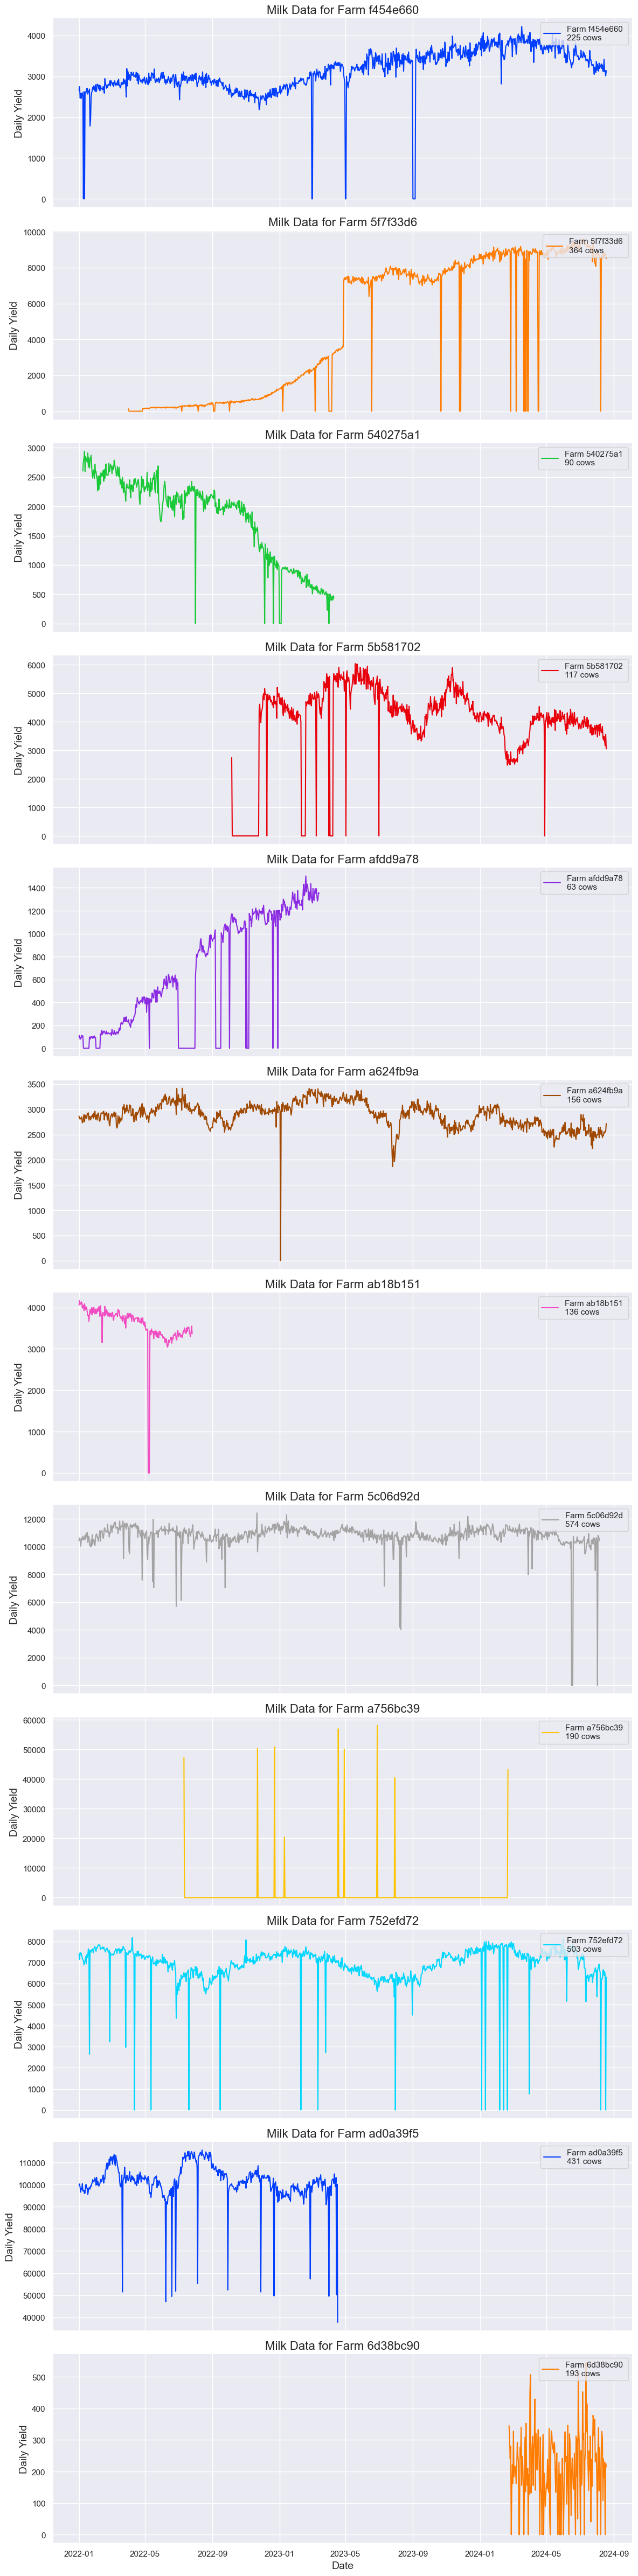

In [15]:
# Drop all rows with Unknown in SE_Number
data = data[data['SE_Number'] != 'Unknown']

# Create a subplot for each farm
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
    daily_yield = daily_yield.reindex(all_dates, fill_value=0)
    
    ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
    ax.set_title(f'Milk Data for Farm {farm}', fontsize=16)
    ax.set_ylabel('Daily Yield', fontsize=14)
    ax.legend(loc='upper right')
    ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()


## Check how much milk each farm yields each day over time when we take away those cows that does not have a DaysInMilk and when it could not be imputed

In [16]:
# Count missing DaysInMilk for each farm
missing_days_in_milk_count = data['DaysInMilk'].isna().groupby(data['FarmName_Pseudo']).sum()
print("Missing DaysInMilk count per farm:")
print(missing_days_in_milk_count)

Missing DaysInMilk count per farm:
FarmName_Pseudo
540275a1    47305
5b581702        5
5c06d92d     8805
5f7f33d6        2
6d38bc90        3
752efd72      999
a624fb9a      684
a756bc39      266
ab18b151        0
ad0a39f5     5968
afdd9a78      833
f454e660     3110
Name: DaysInMilk, dtype: int64


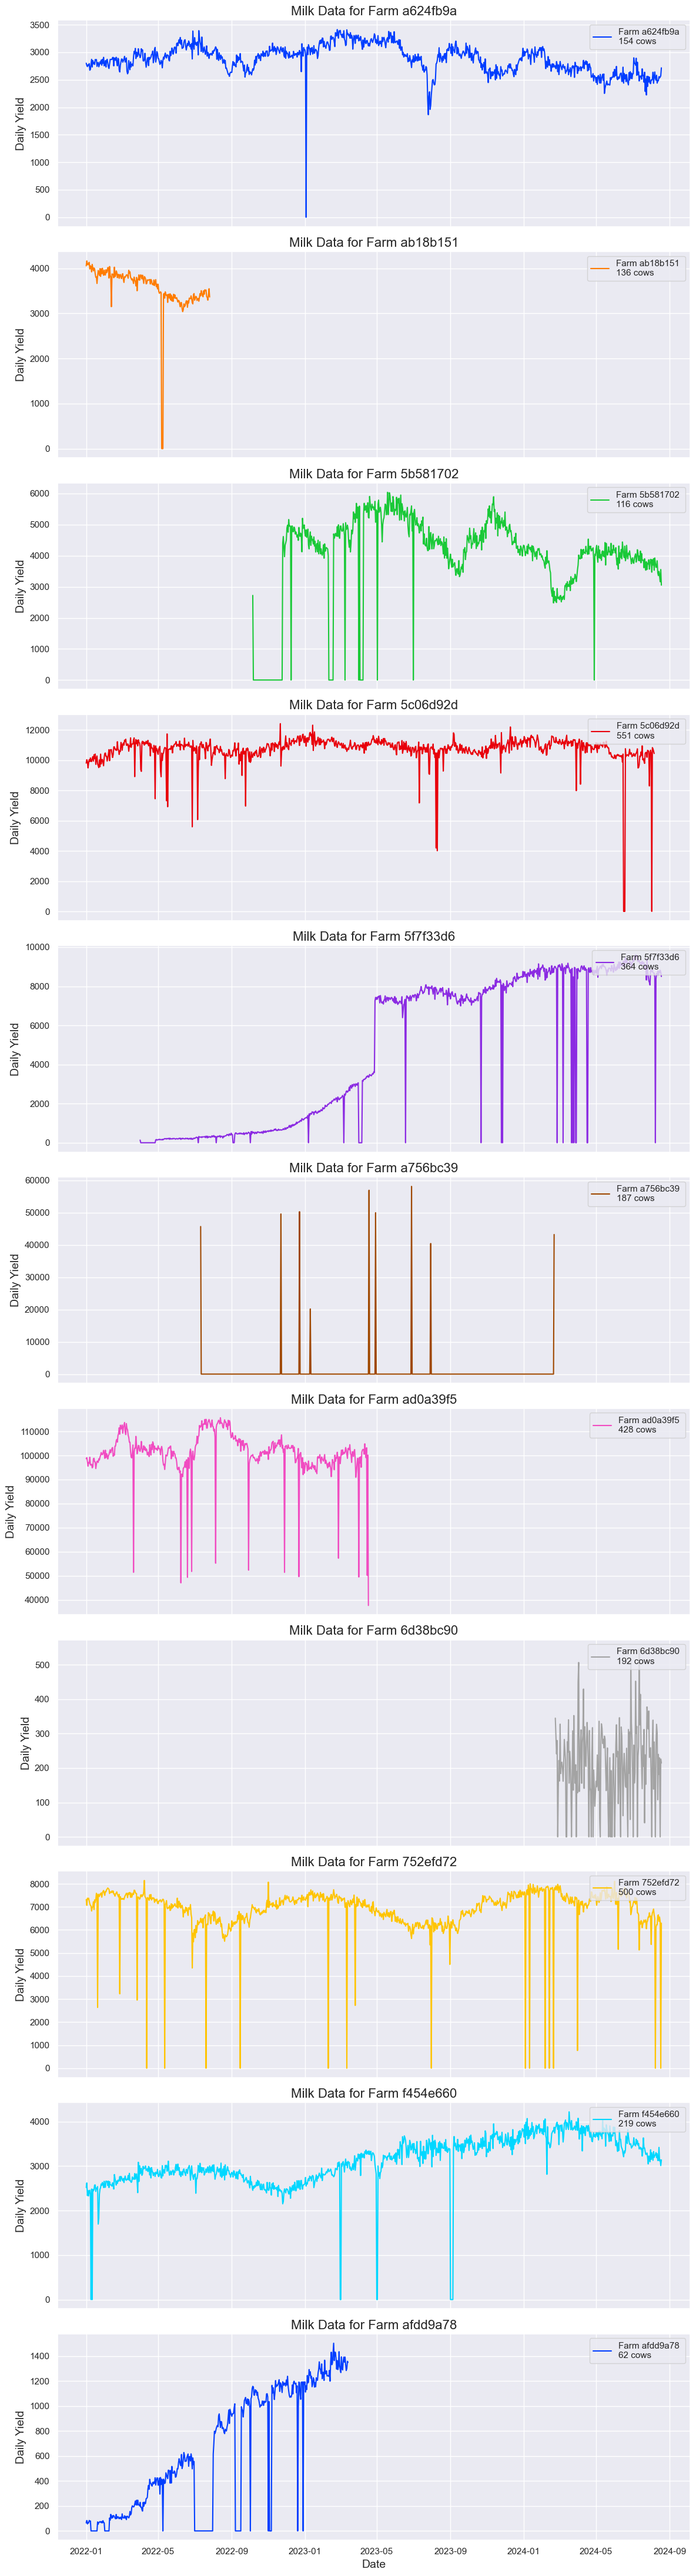

In [17]:
# Drop all rows with missing DaysInMilk
data.dropna(subset=['DaysInMilk'], inplace=True)

# Ensure StartDate is valid and no NaT values exist
data['StartDate'] = pd.to_datetime(data['StartDate'], errors='coerce')
data.dropna(subset=['StartDate'], inplace=True)

# List of farms to plot
list_of_farms = data['FarmName_Pseudo'].unique()

# Create a subplot for each farm
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    
    # Drop NaT values in the index
    daily_yield = daily_yield.dropna()
    
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    
    # Ensure there are valid dates
    if daily_yield.index.isna().any() or daily_yield.empty:
        print(f"Skipping farm {farm} due to invalid date range.")
        continue
    
    all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
    daily_yield = daily_yield.reindex(all_dates, fill_value=0)
    
    ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
    ax.set_title(f'Milk Data for Farm {farm}', fontsize=16)
    ax.set_ylabel('Daily Yield', fontsize=14)
    ax.legend(loc='upper right')
    ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

## Check how much milk each farm yields each day over time when we take away those cows that does not have a LactationNumber and when it could not be imputed

In [18]:
# Count missing LactationNumber for each farm
missing_LactationNumber_count = data['LactationNumber'].isna().groupby(data['FarmName_Pseudo']).sum()
print("Missing LactationNumber count per farm:")
print(missing_LactationNumber_count)

Missing LactationNumber count per farm:
FarmName_Pseudo
5b581702    0
5c06d92d    0
5f7f33d6    0
6d38bc90    0
752efd72    0
a624fb9a    0
a756bc39    0
ab18b151    0
ad0a39f5    0
afdd9a78    0
f454e660    0
Name: LactationNumber, dtype: int64


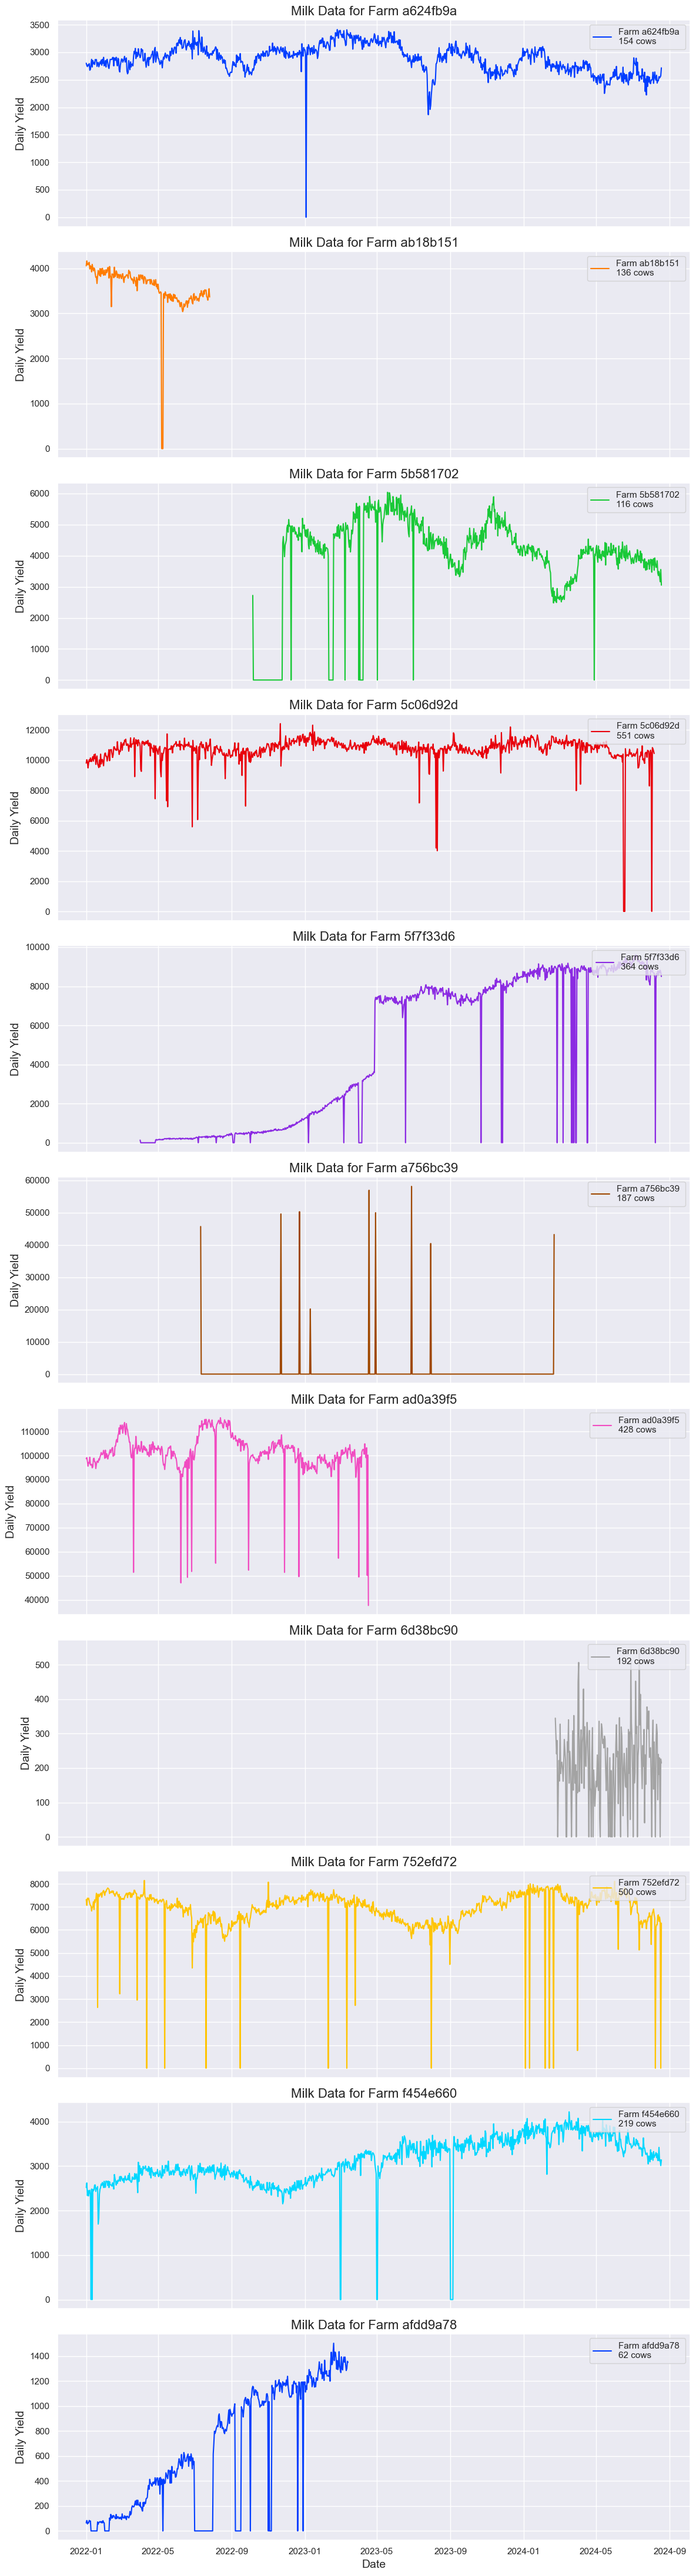

In [19]:
# Drop all rows with missing LactationNumber
data.dropna(subset=['LactationNumber'], inplace=True)

# Create a subplot for each farm
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
    daily_yield = daily_yield.reindex(all_dates, fill_value=0)
    
    ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
    ax.set_title(f'Milk Data for Farm {farm}', fontsize=16)
    ax.set_ylabel('Daily Yield', fontsize=14)
    ax.legend(loc='upper right')
    ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

## Check how much milk each farm yields each day over time when we take away those cows that does not have a BreedName

In [20]:
# Count missing BreedName for each farm
missing_breed_name_count = data['BreedName'].isna().groupby(data['FarmName_Pseudo']).sum()
print("Missing BreedName count per farm:")
print(missing_breed_name_count)

Missing BreedName count per farm:
FarmName_Pseudo
5b581702     56272
5c06d92d         0
5f7f33d6         0
6d38bc90         0
752efd72         0
a624fb9a         0
a756bc39      7496
ab18b151         0
ad0a39f5    131696
afdd9a78         0
f454e660         0
Name: BreedName, dtype: int64


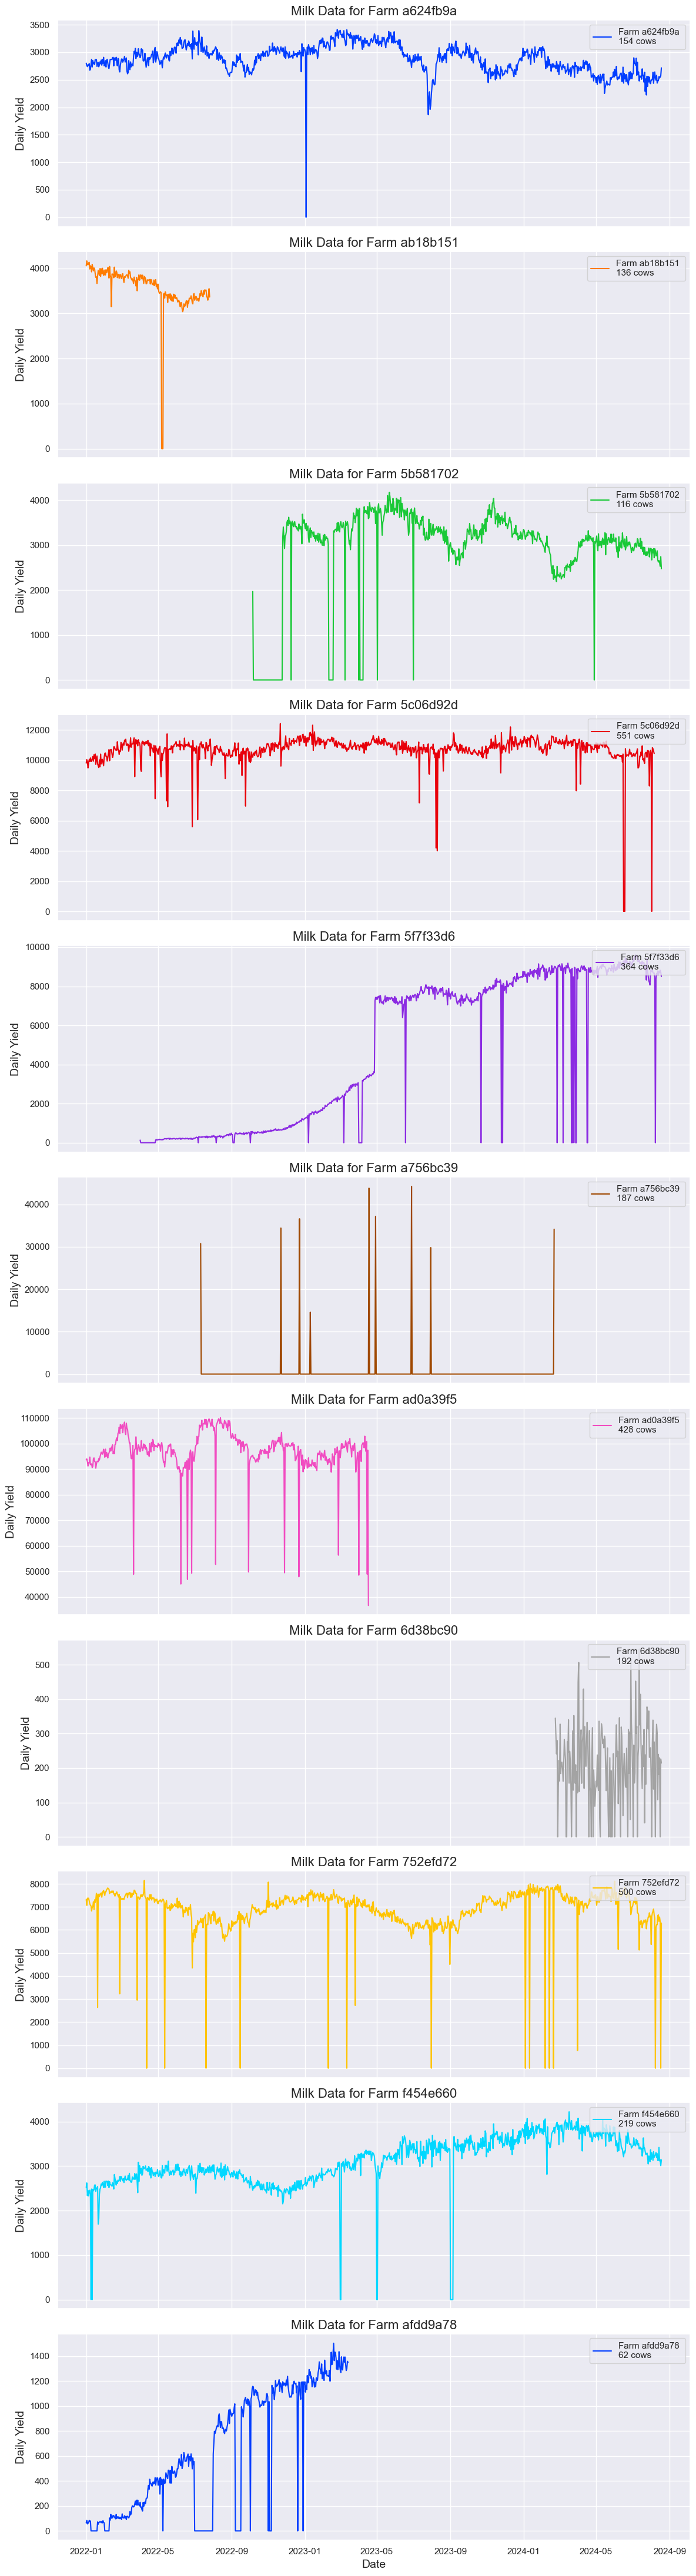

In [21]:
# Drop all rows with missing BreedName
data.dropna(subset=['BreedName'], inplace=True)

# Create a subplot for each farm
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
    daily_yield = daily_yield.reindex(all_dates, fill_value=0)
    
    ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
    ax.set_title(f'Milk Data for Farm {farm}', fontsize=16)
    ax.set_ylabel('Daily Yield', fontsize=14)
    ax.legend(loc='upper right')
    ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

## Check how much milk each farm yields each day over time when we take away those cows that does not have a BirthDate

In [22]:
# Count missing BirthDate for each farm
missing_birth_date_count = data['StartDate'].isna().groupby(data['FarmName_Pseudo']).sum()
print("Missing BirthDate count per farm:")
print(missing_birth_date_count)

Missing BirthDate count per farm:
FarmName_Pseudo
5b581702    0
5c06d92d    0
5f7f33d6    0
6d38bc90    0
752efd72    0
a624fb9a    0
a756bc39    0
ab18b151    0
ad0a39f5    0
afdd9a78    0
f454e660    0
Name: StartDate, dtype: int64


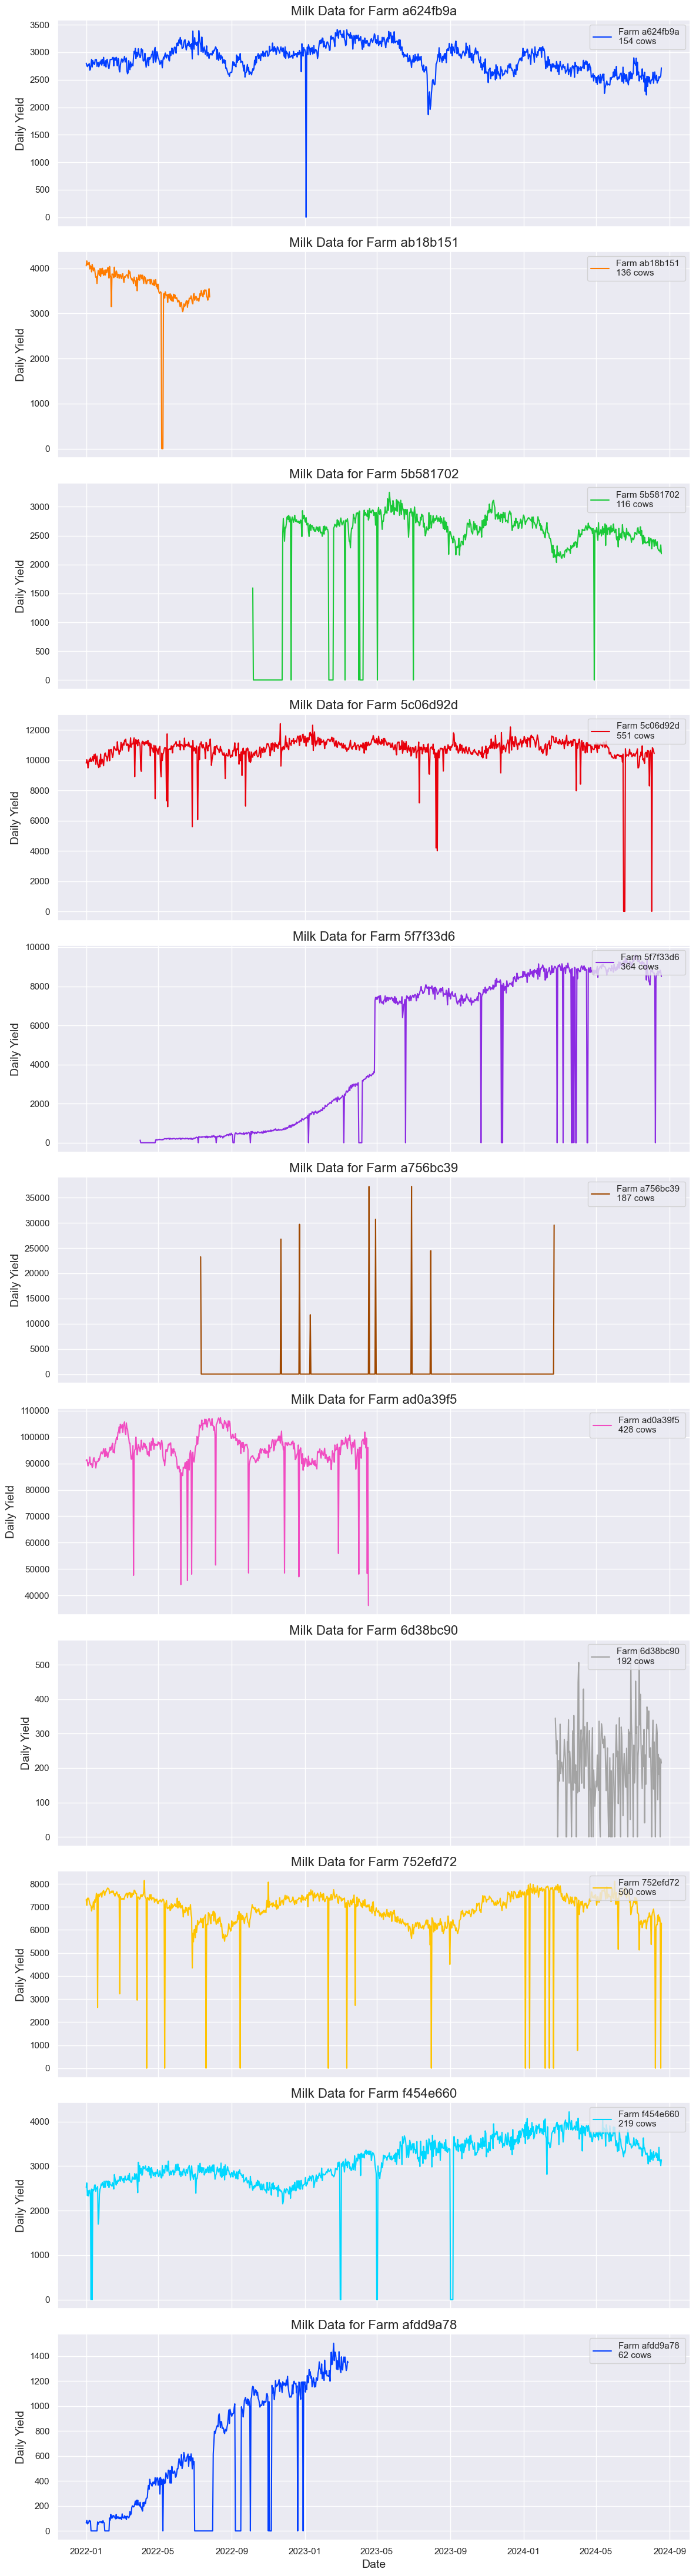

In [23]:
# Drop all rows with missing BirthDate
data.dropna(subset=['BirthDate'], inplace=True)

# Create a subplot for each farm
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
    daily_yield = daily_yield.reindex(all_dates, fill_value=0)
    
    ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
    ax.set_title(f'Milk Data for Farm {farm}', fontsize=16)
    ax.set_ylabel('Daily Yield', fontsize=14)
    ax.legend(loc='upper right')
    ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

In [24]:
# Convert BirthDate to age in days
data['Age'] = (data['StartDate'] - data['BirthDate']).dt.days

# Remove BirthDate column
data.drop(columns=['BirthDate'], inplace=True)

data.head()

FarmName_Pseudo         SE_Number  AnimalNumber  StartDate StartTime  \
0        a624fb9a  SE-064c0cec-1189          5189 2022-01-01  06:25:00   
1        a624fb9a  SE-064c0cec-1189          5189 2022-01-01  16:41:00   
2        a624fb9a  SE-064c0cec-1189          5189 2022-01-02  15:29:00   
3        a624fb9a  SE-064c0cec-1189          5189 2022-01-02  22:44:00   
4        a624fb9a  SE-064c0cec-1189          5189 2022-01-02  03:31:00   

   LactationNumber  DaysInMilk  TotalYield            DateTime YearSeason  \
0              7.0       191.0       13.90 2022-01-01 06:25:00     2022-1   
1              7.0       191.0       16.87 2022-01-01 16:41:00     2022-1   
2              7.0       192.0       20.41 2022-01-02 15:29:00     2022-1   
3              7.0       192.0       11.53 2022-01-02 22:44:00     2022-1   
4              7.0       192.0       16.28 2022-01-02 03:31:00     2022-1   

   ... Mother Father CullDecisionDate Temperature  RelativeHumidity  \
0  ...    NaN    NaN       2022-12-20   -3.025000          0.930917   
1  ...    NaN    NaN       2022-12-20   -3.025000          0.930917   
2  ...    NaN    NaN       2022-12-20   -0.279167          0.990542   
3  ...    NaN    NaN       2022-12-20   -0.279167          0.990542   
4  ...    NaN    NaN       2022-12-20   -0.279167          0.990542   

     THI_adj  HW  cum_HW  Temp15Threshold   Age  
0  28.012944   0       0                0  3095  
1  28.012944   0       0                0  3095  
2  32.898193   0       0                0  3096  
3  32.898193   0       0                0  3096  
4  32.898193   0       0                0  3096  

[5 rows x 21 columns]

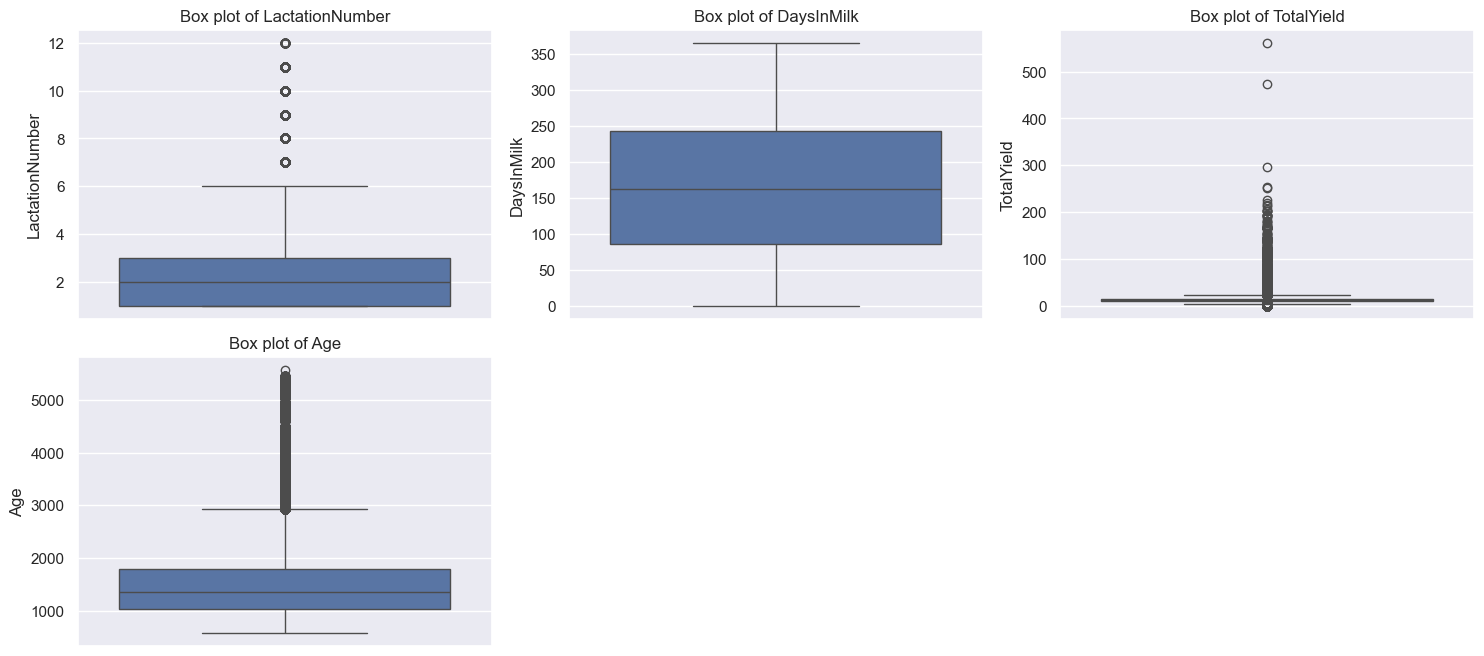

In [25]:
# List of columns to check for outliers
columns = ["LactationNumber", "DaysInMilk", "TotalYield", "Age"]

# Visual Inspection using Box Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [26]:
# List of columns to check for outliers
columns = ["TotalYield", "DaysInMilk", "Age"]

# Z-Score Method
def z_score_outliers(data, threshold=3):
    outliers = pd.DataFrame()
    for column in columns:
        mean = np.mean(data[column])
        std = np.std(data[column])
        z_scores = (data[column] - mean) / std
        outliers[column] = np.abs(z_scores) > threshold
    return outliers

outliers_z_score = z_score_outliers(data)
print("Outliers detected by Z-Score method:")
outliers_z_score.sum()

Outliers detected by Z-Score method:


TotalYield    64726
DaysInMilk        0
Age           37791
dtype: int64

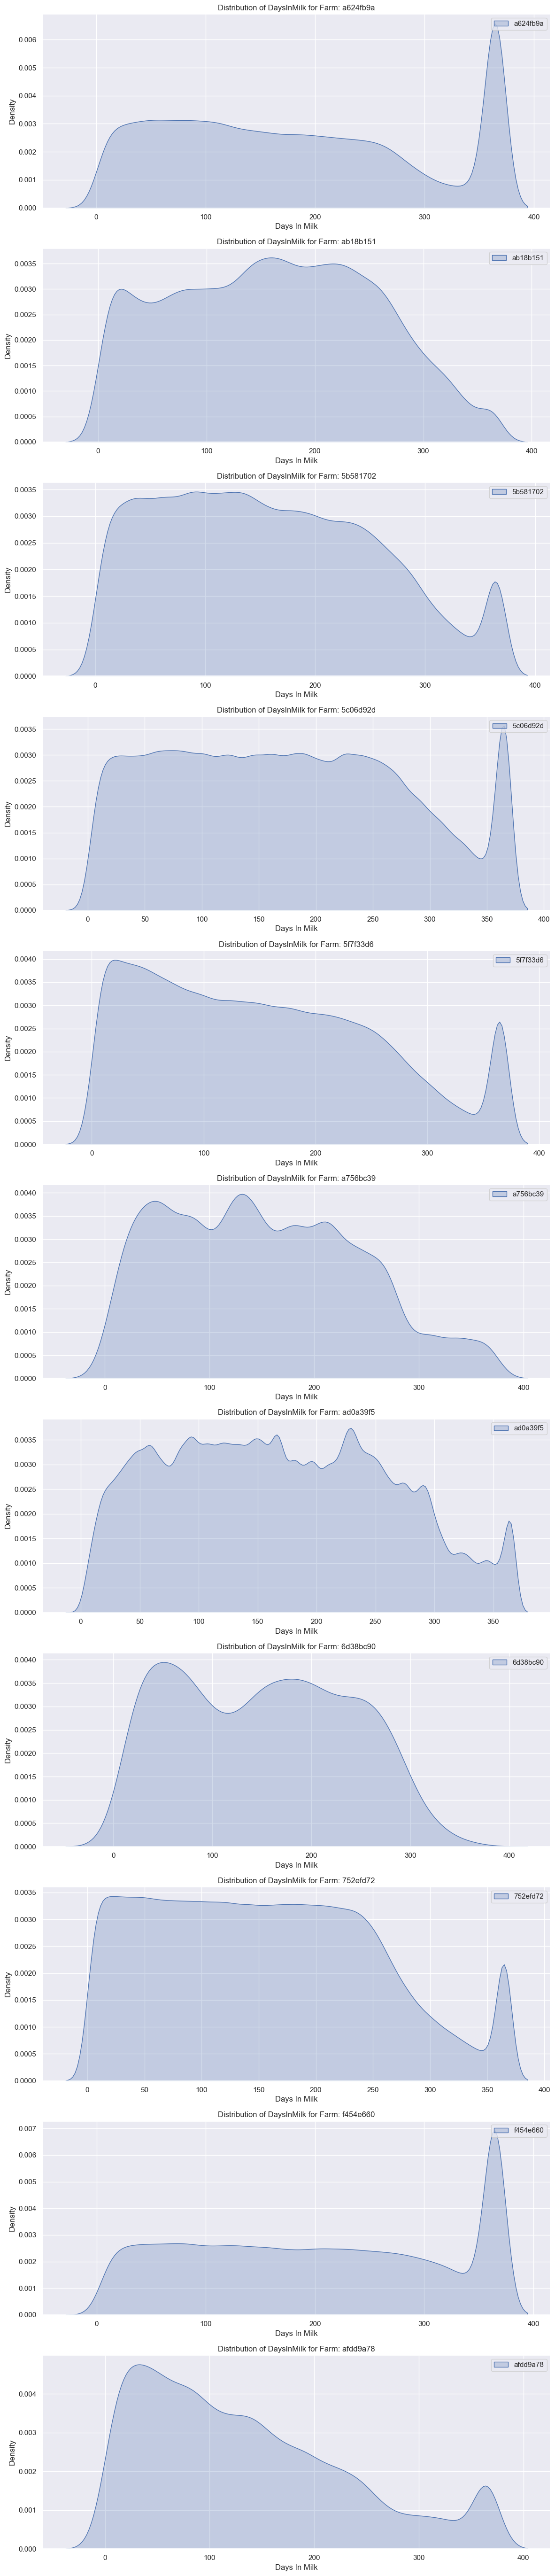

In [27]:
# Get the unique farms
farms = data['FarmName_Pseudo'].unique()

# Set up the figure size
plt.figure(figsize=(12, len(farms) * 5))

# Loop through each farm and plot separately
for i, farm in enumerate(farms):
    plt.subplot(len(farms), 1, i + 1)
    farm_data = data[data['FarmName_Pseudo'] == farm]
    sns.kdeplot(farm_data['DaysInMilk'], label=farm, fill=True)
    plt.title(f'Distribution of DaysInMilk for Farm: {farm}')
    plt.xlabel('Days In Milk')
    plt.ylabel('Density')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

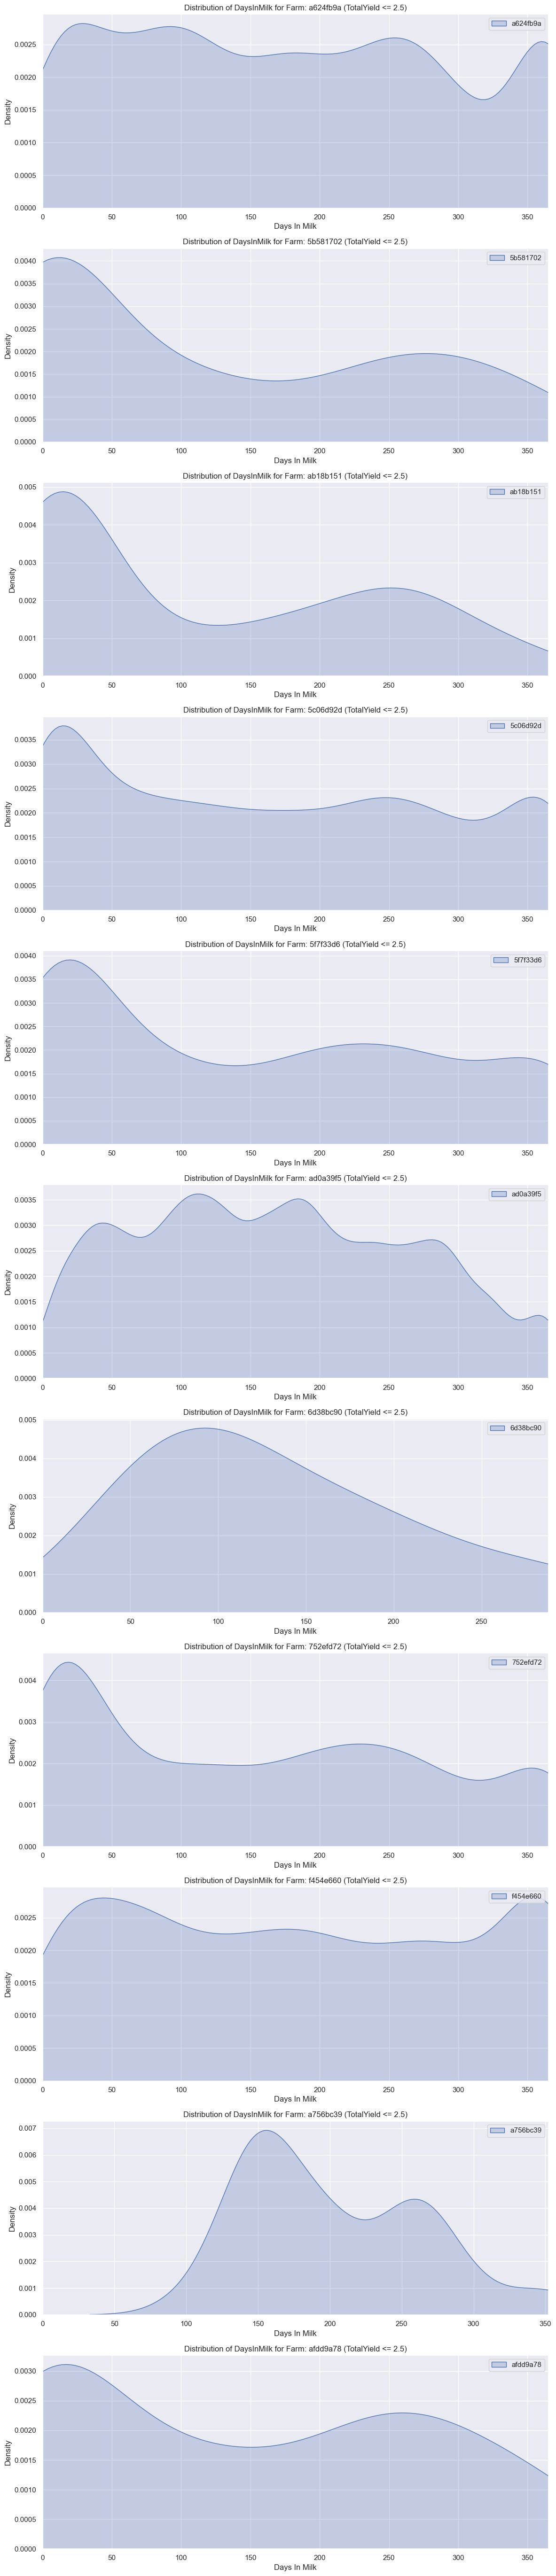

In [28]:
# Filter the dataset for TotalYield <= 2.5
filtered_data = data[data['TotalYield'] <= 2.5]

# Get the unique farms
farms = filtered_data['FarmName_Pseudo'].unique()

# Set up the figure size
plt.figure(figsize=(12, len(farms) * 5))

# Loop through each farm and plot separately
for i, farm in enumerate(farms):
    plt.subplot(len(farms), 1, i + 1)
    farm_data = filtered_data[filtered_data['FarmName_Pseudo'] == farm]
    
    sns.kdeplot(farm_data['DaysInMilk'], label=farm, fill=True)
    plt.title(f'Distribution of DaysInMilk for Farm: {farm} (TotalYield <= 2.5)')
    plt.xlabel('Days In Milk')
    plt.ylabel('Density')
    plt.xlim(0, farm_data['DaysInMilk'].max())
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### TotalYield has way too many outliars, it should not be able to be more than 60 litres at maximum for one milking session e.g., hence we need to take away some of the values.

In [29]:
# Count instances with TotalYield greater than 60
count_invalid_total_yield = data[data['TotalYield'] > 60].shape[0]
print(f"Number of instances with TotalYield greater than 60: {count_invalid_total_yield}")

Number of instances with TotalYield greater than 60: 435


In [30]:
# Count instances with TotalYield lower than 2.5
count_invalid_total_yield = data[data['TotalYield'] < 2.5].shape[0]
print(f"Number of instances with TotalYield lower than 2.5: {count_invalid_total_yield}")

# Count instances with TotalYield lower than 2.5 for all farms separately
count_invalid_total_yield = data[data['TotalYield'] < 2.5].groupby('FarmName_Pseudo').size()
print(f"Number of instances with TotalYield lower than 2.5 for each farm:")
print(count_invalid_total_yield)

Number of instances with TotalYield lower than 2.5: 39620
Number of instances with TotalYield lower than 2.5 for each farm:
FarmName_Pseudo
5b581702      165
5c06d92d     3154
5f7f33d6      665
6d38bc90        8
752efd72     2619
a624fb9a     2898
a756bc39       83
ab18b151      239
ad0a39f5    28283
afdd9a78      107
f454e660     1399
dtype: int64


In [31]:
# Remove instances with TotalYield greater than 60
data = data[data['TotalYield'] <= 60]

# Remove instances with TotalYield lower than 2.5
data = data[data['TotalYield'] >= 2.5]

# Verify the removal
count_after_removal = data.shape[0]
print(f"Number of instances after removing TotalYield greater than 60 and lower than 2.5: {count_after_removal}")

Number of instances after removing TotalYield greater than 60 and lower than 2.5: 5777975


If we do not take away yields lower than 2.5, farm 5c06d92d has a lot of (wrongly?) values

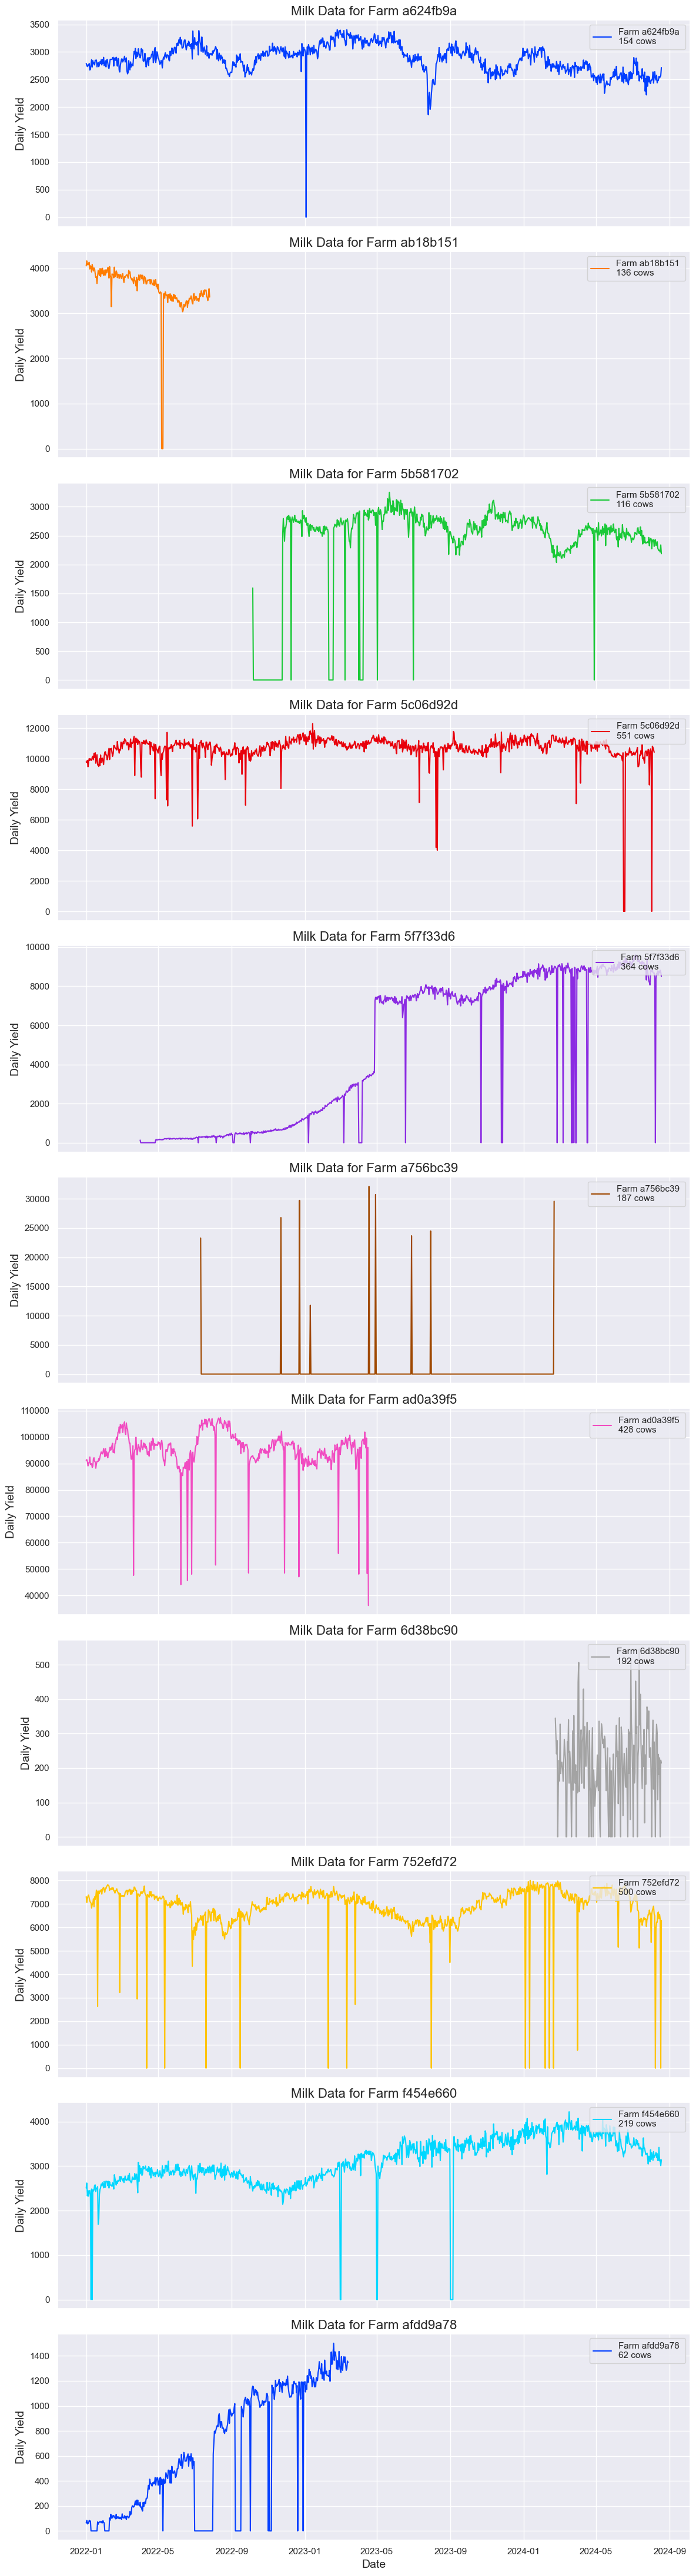

In [32]:
# Create a subplot for each farm
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    
    # Check if daily_yield has valid dates
    if not daily_yield.empty and pd.notna(daily_yield.index.min()) and pd.notna(daily_yield.index.max()):
        color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
        farm_color_mapping[farm] = color
        all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
        daily_yield = daily_yield.reindex(all_dates, fill_value=0)
        
        ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
        ax.set_title(f'Milk Data for Farm {farm}', fontsize=16)
        ax.set_ylabel('Daily Yield', fontsize=14)
        ax.legend(loc='upper right')
        ax.grid(True)
    else:
        ax.set_title(f'Milk Data for Farm {farm} (No valid data)', fontsize=16)
        ax.set_ylabel('Daily Yield', fontsize=14)
        ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()


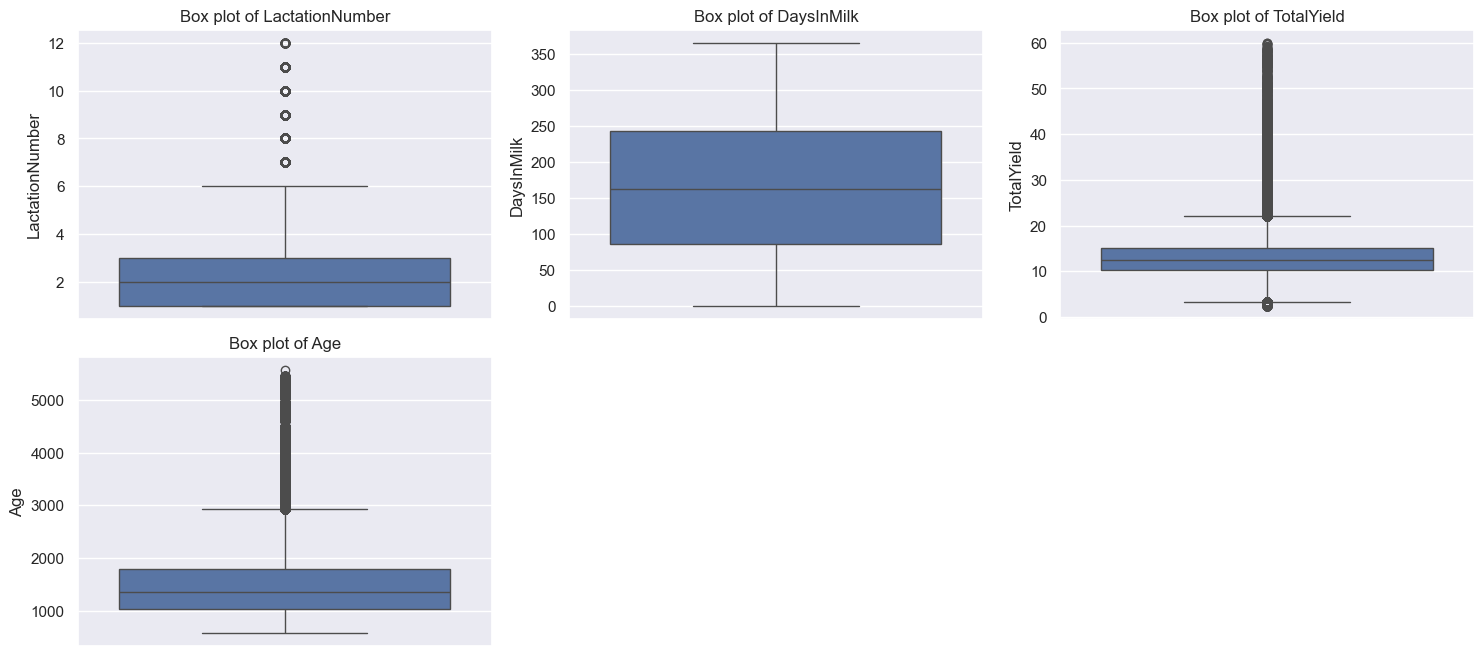

In [33]:
# List of columns to check for outliers
columns = ["LactationNumber", "DaysInMilk", "TotalYield", "Age"]

# Visual Inspection using Box Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

## Which Farms To Choose 

Some columns are to important to not have, thus, when we now have filtered all the data here, after the exploration, we can see that these following farms have sufficient data: 

**a624fb9a**

**5c06d92d**

**752efd72**

**f454e660**

In [34]:
selected_farms = ['a624fb9a', '5c06d92d', '752efd72', 'f454e660']
data = data[data['FarmName_Pseudo'].isin(selected_farms)]

# Save the cleaned data to a new CSV file called 'CleanedYieldData.csv' in same folder
data.to_csv('../Data/MergedData/CleanedYieldData.csv', index=False)

### Variables Explanation for `CleanedYieldData.csv`

1. **FarmName_Pseudo**:
   - Description: A pseudonym for the farm where the data was collected.
   - Datatype: `str`
   - Example: `ab18b151`

2. **SE_Number**:
   - Description: A unique identifier for each cow, typically formatted to include the farm and animal number.
   - Datatype: `str`
   - Example: `SE-ab18b151-1014`

3. **AnimalNumber**:
   - Description: The specific animal number within the farm.
   - Datatype: `Int64`
   - Example: `1014`

4. **StartDate**:
   - Description: The date when the yield measurement started.
   - Datatype: `str` (should be converted to `datetime` for operations)
   - Format: `YYYY-MM-DD`
   - Example: `2022-06-25`

5. **StartTime**:
   - Description: The time when the yield measurement started.
   - Datatype: `str`
   - Format: `HH:mm:ss`
   - Example: `23:23:00`

6. **LactationNumber**:
   - Description: The number indicating the lactation cycle of the cow.
   - Datatype: `Int64`
   - Example: `6`

7. **DaysInMilk**:
   - Description: The number of days the cow has been lactating at the time of recording.
   - Datatype: `Int64`
   - Example: `216`

8. **YearSeason**:
   - Description: A categorical variable representing the season based on the month and year.
   - Datatype: `str`
   - Example: `2022-3`
   - YearSeason parameters:
     - 1: Dec-Feb
     - 2: Mar-May
     - 3: Jun-Aug
     - 4: Sep-Nov

9. **TotalYield**:
   - Description: The total yield (e.g., milk yield) recorded during the session.
   - Datatype: `float`
   - Example: `14.64`

10. **DateTime**:
    - Description: The combined date and time when the yield was recorded.
    - Datatype: `str` (should be converted to `datetime` for operations)
    - Format: `YYYY-MM-DD HH:mm:ss`
    - Example: `2022-06-25 23:23:00`

11. **BreedName**:
    - Description: The breed of the cow.
    - Datatype: `str`
    - Example: `Holstein`

12. **BirthDate**:
    - Description: The birth date of the cow.
    - Datatype: `str` (should be converted to `datetime` for operations)
    - Format: `YYYY-MM-DD`
    - Example: `2016-04-20`

13. **Mother**:
    - Description: The identifier for the mother of the cow.
    - Datatype: `str`
    - Example: `SE-ab18b151-0864`

14. **Father**:
    - Description: The identifier for the father of the cow.
    - Datatype: `str`
    - Example: `9-6179 Viktor`

15. **CullDecisionDate**:
    - Description: The date when a cull decision was made for the cow, if applicable.
    - Datatype: `str` (should be converted to `datetime` for operations)
    - Format: `YYYY-MM-DD`
    - Example: `2023-05-01`

16. **Temperature**:
    - Description: The temperature recorded at the time of yield measurement.
    - Datatype: `float`
    - Example: `22.42`

17. **RelativeHumidity**:
    - Description: The relative humidity recorded at the time of yield measurement.
    - Datatype: `float`
    - Example: `0.574375`

18. **THI_adj**:
    - Description: The adjusted Temperature-Humidity Index at the time of yield measurement.
    - Datatype: `float`
    - Example: `68.753648`

19. **HW**:
    - Description: A binary variable indicating the presence of a heatwave on the day of measurement (0: no heatwave, 1: heatwave).
    - Datatype: `Int64`
    - Example: `0`

20. **cum_HW**:
    - Description: Cumulative number of heatwave days up to the current date.
    - Datatype: `Int64`
    - Example: `0`

21. **Temp15Threshold**:
    - Description: A binary variable indicating if the temperature exceeded 15°C on the day of measurement (0: no, 1: yes).
    - Datatype: `Int64`
    - Example: `1`

22. **Age**:
    - Description: The age of the cow in days at the time of yield measurement.
    - Datatype: `Int64`
    - Example: `2793`
